In [1924]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.pyplot
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

#from bs4 import BeautifulSoup #library for webscraping

print('Libraries imported.')

Libraries imported.


## Classification of Milano NILs by gren and pet-friendly indicators

Using the previously manipulate data (notebook from 1 to 4), neighborhoods of Milano have been classified using K-means clustering.

In [1925]:
df_NIL=pd.read_csv('NIL_data') #data with geographical coordinates of the NILs (neighborhoods) of Milano (see notebook 1)

In [1926]:
print(df_NIL.shape)
df_NIL.head()

(88, 6)


,ID_NIL,NIL,NIL_Long,NIL_Lat,NIL_Area_mq,MUN
0,1,DUOMO,9.186948,45.463707,2.341704e+06,1
1,2,BRERA,9.188157,45.474252,1.637395e+06,1
2,3,GIARDINI P.TA VENEZIA,9.200231,45.474564,2.496468e+05,1
3,4,GUASTALLA,9.201891,45.463219,1.548021e+06,1
4,5,PORTA VIGENTINA - PORTA LODOVICA,9.192446,45.450950,1.135239e+06,1


In [1927]:
df_aggr_dog=pd.read_csv('aggr_dog_areas_data.csv') #data of the dog areas of Milano (see notebook 2)

In [1928]:
print(df_aggr_dog.shape)
df_aggr_dog.head()

(76, 8)


,bigger_dog_area_mq,MUN,ID_NIL,NIL,bigger_dog_area_long,bigger_dog_area_lat,num_dog_area,sum_dog_area_mq
0,1567.106991,1,1,DUOMO,9.183142,45.458010,1,1567.106991
1,1256.636866,1,2,BRERA,9.190329,45.477792,2,1363.454199
2,7942.425550,1,3,GIARDINI P.TA VENEZIA,9.198413,45.474107,2,12599.599350
3,549.244339,1,4,GUASTALLA,9.202896,45.454228,3,996.685367
4,4703.437904,5,5,PORTA VIGENTINA - PORTA LODOVICA,9.193120,45.447192,6,10534.321173


In [1929]:
df_parks=pd.read_csv('parks_with_NIL') #data of the parks of Milano (see notebook 4)

In [1930]:
print(df_parks.shape)
df_parks.head()

(90, 5)


,park_name,ID_NIL,park_area_mq,lat_parks,long_parks
0,BOSCO DI BRUZZANO,84,121543.114746,45.526289,9.184721
1,COLLINA DEI CILIEGI,13,30021.861328,45.511735,9.208747
2,COLLINA DEI CILIEGI,15,768.965332,45.513137,9.209554
3,GIARDINI PUBBLICI INDRO MONTANELLI,3,192970.566406,45.474693,9.200340
4,GIARDINO ALBERTO MORAVIA,53,69817.473145,45.456324,9.126378


#### Data Manipulation

The goal is to obtain a dataframe with aggregated information about parks, dog areas and geographical info of the NILs

In [1931]:
df_parks.sort_values(['ID_NIL','park_area_mq'],inplace=True)
df_parks.reset_index(drop=True,inplace=True)

print(df_parks.shape)
df_parks

(90, 5)


,park_name,ID_NIL,park_area_mq,lat_parks,long_parks
0,PARCO PAPA GIOVANNI PAOLO II,1,106.402832,45.458516,9.182867
1,GIARDINO PEREGO,2,4665.222656,45.472059,9.192042
2,GIARDINO DELLA VILLA BELGIOJOSO BONAPARTE,3,19281.405762,45.472204,9.199018
3,GIARDINI PUBBLICI INDRO MONTANELLI,3,192970.566406,45.474693,9.200340
4,GIARDINO ROTONDA DELLA BESANA,4,7202.773438,45.459595,9.205299
5,GIARDINO DELLA GUASTALLA,4,33585.192383,45.460056,9.197717
6,GIARDINO DI VIA VIGONI,5,7028.630371,45.453339,9.195177
7,GIARDINO ROBERTO BAZLEN,5,7687.455566,45.454382,9.197431
8,GIARDINO ORIANA FALLACI,5,8323.809082,45.453442,9.194336
9,PARCO ALESSANDRINA RAVIZZA,5,73821.117188,45.447620,9.192879


In [1932]:
#find the number of parks for each neighborhood
print(df_parks.groupby('ID_NIL').size())
num_parks=df_parks.groupby('ID_NIL').size().to_list()
print(len(num_parks))

num_parks

ID_NIL
1     1
2     1
3     2
4     2
5     4
6     3
7     1
8     1
9     1
10    1
11    1
12    2
13    3
14    1
15    2
16    1
17    1
18    1
19    2
20    1
21    1
23    1
24    2
25    1
26    1
28    2
29    2
35    1
37    1
42    2
43    2
44    2
48    1
50    3
53    5
54    1
55    4
56    3
60    2
61    2
62    1
64    2
65    1
66    1
68    1
70    2
71    1
76    2
77    1
79    2
80    1
81    2
84    1
87    1
dtype: int64
54


[1,
 1,
 2,
 2,
 4,
 3,
 1,
 1,
 1,
 1,
 1,
 2,
 3,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 3,
 5,
 1,
 4,
 3,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 1]

In [1933]:
#find the total area of parks for each neighborhood
print(df_parks.groupby('ID_NIL')['park_area_mq'].sum())
sum_area_parks=df_parks.groupby('ID_NIL')['park_area_mq'].sum().to_list()

print(len(sum_area_parks))
sum_area_parks

ID_NIL
1        106.402832
2       4665.222656
3     212251.972168
4      40787.965820
5      96861.012207
6      93071.801758
7        234.118164
8     427356.182617
9       3474.496582
10       110.123047
11     11117.020020
12     50199.974121
13     94672.897949
14      4406.505371
15      5425.867188
16       248.708496
17    132221.497070
18    773404.921875
19    146274.875488
20    102956.255859
21      8283.068848
23    118132.602539
24    651713.144043
25     10963.401367
26     89576.688232
28     17751.434570
29    129504.770020
35    132367.074219
37     48510.560547
42    104600.147949
43     37618.881348
44     93790.023438
48    100150.340820
50     94875.379395
53    293916.408691
54    147658.328125
55    974645.664551
56    505568.717773
60    306372.548340
61    217973.517578
62      3912.178223
64    297941.403320
65     42007.590820
66    312400.660156
68     96998.403320
70     39307.322266
71       164.037109
76    256394.873535
77     63741.440430
79     40750.

[106.4028320313,
 4665.2226562501,
 212251.97216796892,
 40787.96582031251,
 96861.01220703158,
 93071.80175781302,
 234.1181640627,
 427356.18261718843,
 3474.4965820313,
 110.123046875,
 11117.0200195313,
 50199.974121094616,
 94672.89794922032,
 4406.5053710939,
 5425.8671875002,
 248.70849609380002,
 132221.49707031267,
 773404.9218750003,
 146274.87548828128,
 102956.2558593758,
 8283.068847656401,
 118132.6025390672,
 651713.144042969,
 10963.401367187498,
 89576.68823242189,
 17751.434570312602,
 129504.77001953189,
 132367.0742187503,
 48510.5605468756,
 104600.14794921919,
 37618.8813476566,
 93790.02343750041,
 100150.3408203126,
 94875.37939453425,
 293916.4086914077,
 147658.3281249998,
 974645.6645507818,
 505568.7177734391,
 306372.5483398442,
 217973.51757812654,
 3912.1782226563,
 297941.4033203129,
 42007.5908203125,
 312400.66015624994,
 96998.40332031275,
 39307.32226562531,
 164.037109375,
 256394.87353515683,
 63741.4404296875,
 40750.353515625095,
 88204.728271484

In [1934]:
#keeping the area of only the bigger park for each neighborhood 
#(data are grouped by NIL and ordered, keeping the last we keep the max!)

df_parks=df_parks.drop_duplicates(subset=['ID_NIL'],keep='last').reset_index(drop=True)
print(df_parks.shape)
df_parks.head()

(54, 5)


,park_name,ID_NIL,park_area_mq,lat_parks,long_parks
0,PARCO PAPA GIOVANNI PAOLO II,1,106.402832,45.458516,9.182867
1,GIARDINO PEREGO,2,4665.222656,45.472059,9.192042
2,GIARDINI PUBBLICI INDRO MONTANELLI,3,192970.566406,45.474693,9.200340
3,GIARDINO DELLA GUASTALLA,4,33585.192383,45.460056,9.197717
4,PARCO ALESSANDRINA RAVIZZA,5,73821.117188,45.447620,9.192879


In [1935]:
#keeping ony the info we need

df_parks=df_parks[['ID_NIL','park_area_mq']]
df_parks.head()

,ID_NIL,park_area_mq
0,1,106.402832
1,2,4665.222656
2,3,192970.566406
3,4,33585.192383
4,5,73821.117188


In [1936]:
#giving a proper name to the 'bigger park' column

df_parks.rename(columns={'park_area_mq':'bigger_park_mq'},inplace=True)
print(df_parks.shape)
df_parks

(54, 2)


,ID_NIL,bigger_park_mq
0,1,106.402832
1,2,4665.222656
2,3,192970.566406
3,4,33585.192383
4,5,73821.117188
5,6,48255.619629
6,7,234.118164
7,8,427356.182617
8,9,3474.496582
9,10,110.123047


In [1937]:
print(len(sum_area_parks))
print(len(num_parks))

54
54


In [1938]:
#adding the info we have extract before
#now the dataframe with aggregated info about parks is ready


df_parks.insert(1,'num_of_parks',num_parks)
df_parks.insert(3,'sum_area_parks_mq',sum_area_parks)

print(df_parks.shape)
df_parks.head()

(54, 4)


,ID_NIL,num_of_parks,bigger_park_mq,sum_area_parks_mq
0,1,1,106.402832,106.402832
1,2,1,4665.222656,4665.222656
2,3,2,192970.566406,212251.972168
3,4,2,33585.192383,40787.965820
4,5,4,73821.117188,96861.012207


In [1939]:
df_NIL.head()

,ID_NIL,NIL,NIL_Long,NIL_Lat,NIL_Area_mq,MUN
0,1,DUOMO,9.186948,45.463707,2.341704e+06,1
1,2,BRERA,9.188157,45.474252,1.637395e+06,1
2,3,GIARDINI P.TA VENEZIA,9.200231,45.474564,2.496468e+05,1
3,4,GUASTALLA,9.201891,45.463219,1.548021e+06,1
4,5,PORTA VIGENTINA - PORTA LODOVICA,9.192446,45.450950,1.135239e+06,1


In [1940]:
#df_green_dog_NIL is the dataframe in which we collect all the information about parks, dog areas and NIL geo coordinates

df_green_dog_NIL=df_NIL[['ID_NIL','NIL_Area_mq']]

print(df_green_dog_NIL.shape)
df_green_dog_NIL.head()

(88, 2)


,ID_NIL,NIL_Area_mq
0,1,2.341704e+06
1,2,1.637395e+06
2,3,2.496468e+05
3,4,1.548021e+06
4,5,1.135239e+06


In [1941]:
#let's display the information we have about dog areas

print(df_aggr_dog.shape)
df_aggr_dog.head()

(76, 8)


,bigger_dog_area_mq,MUN,ID_NIL,NIL,bigger_dog_area_long,bigger_dog_area_lat,num_dog_area,sum_dog_area_mq
0,1567.106991,1,1,DUOMO,9.183142,45.458010,1,1567.106991
1,1256.636866,1,2,BRERA,9.190329,45.477792,2,1363.454199
2,7942.425550,1,3,GIARDINI P.TA VENEZIA,9.198413,45.474107,2,12599.599350
3,549.244339,1,4,GUASTALLA,9.202896,45.454228,3,996.685367
4,4703.437904,5,5,PORTA VIGENTINA - PORTA LODOVICA,9.193120,45.447192,6,10534.321173


In [1942]:
#organizing in a better way the dataframe 

#df_aggr_dog.drop(columns=df_aggr_dog.columns[[1]+[3]+[4,5]],inplace=True)
df_aggr_dog=df_aggr_dog[['ID_NIL','num_dog_area','bigger_dog_area_mq','sum_dog_area_mq']]
print(df_aggr_dog.shape)
df_aggr_dog.head()

(76, 4)


,ID_NIL,num_dog_area,bigger_dog_area_mq,sum_dog_area_mq
0,1,1,1567.106991,1567.106991
1,2,2,1256.636866,1363.454199
2,3,2,7942.425550,12599.599350
3,4,3,549.244339,996.685367
4,5,6,4703.437904,10534.321173


In [1943]:
#merging dataframe
#populate the df_green_dog_NIL with dog areas information

df_green_dog_NIL=df_green_dog_NIL.merge(df_aggr_dog,how='left',on='ID_NIL')
                             
print(df_green_dog_NIL.shape)
print(df_green_dog_NIL.isnull().sum())
df_green_dog_NIL.head()


(88, 5)
ID_NIL                 0
NIL_Area_mq            0
num_dog_area          12
bigger_dog_area_mq    12
sum_dog_area_mq       12
dtype: int64


,ID_NIL,NIL_Area_mq,num_dog_area,bigger_dog_area_mq,sum_dog_area_mq
0,1,2.341704e+06,1.0,1567.106991,1567.106991
1,2,1.637395e+06,2.0,1256.636866,1363.454199
2,3,2.496468e+05,2.0,7942.425550,12599.599350
3,4,1.548021e+06,3.0,549.244339,996.685367
4,5,1.135239e+06,6.0,4703.437904,10534.321173


In [1944]:
#populate the df_green_dog_NIL with parks information

df_green_dog_NIL=df_green_dog_NIL.merge(df_parks,how='left',on='ID_NIL')
                             
print(df_green_dog_NIL.shape)
print(df_green_dog_NIL.isnull().sum())
df_green_dog_NIL.head()

(88, 8)
ID_NIL                 0
NIL_Area_mq            0
num_dog_area          12
bigger_dog_area_mq    12
sum_dog_area_mq       12
num_of_parks          34
bigger_park_mq        34
sum_area_parks_mq     34
dtype: int64


,ID_NIL,NIL_Area_mq,num_dog_area,bigger_dog_area_mq,sum_dog_area_mq,num_of_parks,bigger_park_mq,sum_area_parks_mq
0,1,2.341704e+06,1.0,1567.106991,1567.106991,1.0,106.402832,106.402832
1,2,1.637395e+06,2.0,1256.636866,1363.454199,1.0,4665.222656,4665.222656
2,3,2.496468e+05,2.0,7942.425550,12599.599350,2.0,192970.566406,212251.972168
3,4,1.548021e+06,3.0,549.244339,996.685367,2.0,33585.192383,40787.965820
4,5,1.135239e+06,6.0,4703.437904,10534.321173,4.0,73821.117188,96861.012207


In [1945]:
df_green_dog_NIL.set_index('ID_NIL',inplace=True)
df_green_dog_NIL.fillna(0,inplace=True)
df_green_dog_NIL.head()

,NIL_Area_mq,num_dog_area,bigger_dog_area_mq,sum_dog_area_mq,num_of_parks,bigger_park_mq,sum_area_parks_mq
ID_NIL,,,,,,,
1,2.341704e+06,1.0,1567.106991,1567.106991,1.0,106.402832,106.402832
2,1.637395e+06,2.0,1256.636866,1363.454199,1.0,4665.222656,4665.222656
3,2.496468e+05,2.0,7942.425550,12599.599350,2.0,192970.566406,212251.972168
4,1.548021e+06,3.0,549.244339,996.685367,2.0,33585.192383,40787.965820
5,1.135239e+06,6.0,4703.437904,10534.321173,4.0,73821.117188,96861.012207


In [1946]:
#function to calculate the percentage

def perc_calc(x,y):
    return (x/y)*100

In [1947]:
#applying the previous function to calculate the percentage of area of a NIL occupied by parks or dog_areas

df_green_dog_NIL['sum_dog_area_mq']=df_green_dog_NIL.apply(
    lambda x: perc_calc(x['sum_dog_area_mq'], x['NIL_Area_mq']),axis=1)
df_green_dog_NIL.head()

,NIL_Area_mq,num_dog_area,bigger_dog_area_mq,sum_dog_area_mq,num_of_parks,bigger_park_mq,sum_area_parks_mq
ID_NIL,,,,,,,
1,2.341704e+06,1.0,1567.106991,0.066922,1.0,106.402832,106.402832
2,1.637395e+06,2.0,1256.636866,0.083270,1.0,4665.222656,4665.222656
3,2.496468e+05,2.0,7942.425550,5.046969,2.0,192970.566406,212251.972168
4,1.548021e+06,3.0,549.244339,0.064384,2.0,33585.192383,40787.965820
5,1.135239e+06,6.0,4703.437904,0.927938,4.0,73821.117188,96861.012207


In [1948]:
#applying the previous function to calculate the percentage of area of a NIL occupied by parks or dog_areas

df_green_dog_NIL['sum_area_parks_mq']=df_green_dog_NIL.apply(
    lambda x: perc_calc(x['sum_area_parks_mq'], x['NIL_Area_mq']),axis=1)
df_green_dog_NIL.head()

,NIL_Area_mq,num_dog_area,bigger_dog_area_mq,sum_dog_area_mq,num_of_parks,bigger_park_mq,sum_area_parks_mq
ID_NIL,,,,,,,
1,2.341704e+06,1.0,1567.106991,0.066922,1.0,106.402832,0.004544
2,1.637395e+06,2.0,1256.636866,0.083270,1.0,4665.222656,0.284917
3,2.496468e+05,2.0,7942.425550,5.046969,2.0,192970.566406,85.020895
4,1.548021e+06,3.0,549.244339,0.064384,2.0,33585.192383,2.634846
5,1.135239e+06,6.0,4703.437904,0.927938,4.0,73821.117188,8.532211


In [1949]:
#assigning proper names to the new columns (not anymore mq but %)

df_green_dog_NIL.rename(columns={'sum_dog_area_mq':'%_dog_area','sum_area_parks_mq':'%_parks_area'},inplace=True)
df_green_dog_NIL.head()

,NIL_Area_mq,num_dog_area,bigger_dog_area_mq,%_dog_area,num_of_parks,bigger_park_mq,%_parks_area
ID_NIL,,,,,,,
1,2.341704e+06,1.0,1567.106991,0.066922,1.0,106.402832,0.004544
2,1.637395e+06,2.0,1256.636866,0.083270,1.0,4665.222656,0.284917
3,2.496468e+05,2.0,7942.425550,5.046969,2.0,192970.566406,85.020895
4,1.548021e+06,3.0,549.244339,0.064384,2.0,33585.192383,2.634846
5,1.135239e+06,6.0,4703.437904,0.927938,4.0,73821.117188,8.532211


In [1950]:
#after trials and errors we conclude that the total area of the NIL and the % occupied by dog areas are not significative
#after trials and errors it has been decded to keep only information about green areas and parks


df_green_dog_NIL.drop(columns=df_green_dog_NIL.columns[[0]+[1]+[2]+[3]],inplace=True)
df_green_dog_NIL.head()

,num_of_parks,bigger_park_mq,%_parks_area
ID_NIL,,,
1,1.0,106.402832,0.004544
2,1.0,4665.222656,0.284917
3,2.0,192970.566406,85.020895
4,2.0,33585.192383,2.634846
5,4.0,73821.117188,8.532211


In [1951]:
#here we have the dataframe that will be processed and analyzed for clustering

df_green_dog_NIL.head()

,num_of_parks,bigger_park_mq,%_parks_area
ID_NIL,,,
1,1.0,106.402832,0.004544
2,1.0,4665.222656,0.284917
3,2.0,192970.566406,85.020895
4,2.0,33585.192383,2.634846
5,4.0,73821.117188,8.532211


## K-means Classification

The goal is to classificate the NIL of MIlano in K-clusters.
The clustering is to individuate the greener areas of Milano

In [1952]:
from sklearn.preprocessing import StandardScaler

In [1953]:
scaler = StandardScaler()
scaler

StandardScaler()

In [1954]:
#create an empty dataframe that will be populated with standardized data

df_scaler=pd.DataFrame(index=df_green_dog_NIL.index,columns=df_green_dog_NIL.columns)
df_scaler

,num_of_parks,bigger_park_mq,%_parks_area
ID_NIL,,,
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
5,NaN,NaN,NaN
6,NaN,NaN,NaN
7,NaN,NaN,NaN
8,NaN,NaN,NaN
9,NaN,NaN,NaN


In [1955]:
#this is the dataframe that results after applying Standard Scaler from sklearn

df_scaler[df_green_dog_NIL.columns]= scaler.fit_transform(df_green_dog_NIL[df_green_dog_NIL.columns])

In [1956]:
df_scaler

,num_of_parks,bigger_park_mq,%_parks_area
ID_NIL,,,
1,-0.021115,-0.498672,-0.425301
2,-0.021115,-0.468588,-0.407084
3,0.907933,0.774061,5.098584
4,0.907933,-0.277741,-0.254399
5,2.766029,-0.012220,0.128779
6,1.836981,-0.180930,0.056234
7,-0.021115,-0.497829,-0.424502
8,-0.021115,2.320800,5.476865
9,-0.021115,-0.476445,-0.396863


In [1957]:
from matplotlib import *
import sys
from pylab import *

In [1958]:
#applying the elbow method to find the best k

distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_scaler)
    distortions.append(kmeanModel.inertia_)

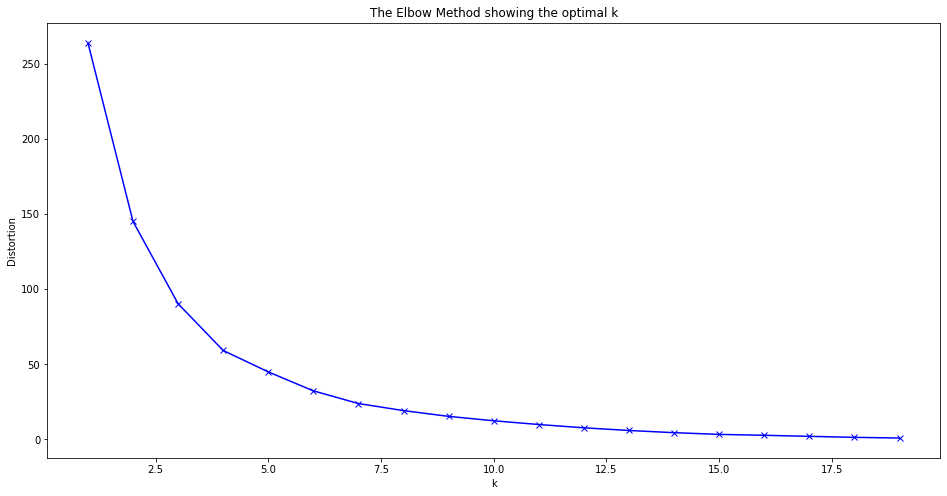

In [1959]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [1960]:
# set number of clusters
kclusters = 6

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_scaler)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([4, 4, 3, 2, 2, 2, 4, 3, 4, 4])

In [1961]:
#add cluster labels to the dataframe

df_green_dog_NIL.insert(0, 'Cluster Labels', kmeans.labels_)

In [1962]:
df_green_dog_NIL

,Cluster Labels,num_of_parks,bigger_park_mq,%_parks_area
ID_NIL,,,,
1,4,1.0,106.402832,0.004544
2,4,1.0,4665.222656,0.284917
3,3,2.0,192970.566406,85.020895
4,2,2.0,33585.192383,2.634846
5,2,4.0,73821.117188,8.532211
6,2,3.0,48255.619629,7.415697
7,4,1.0,234.118164,0.016841
8,3,1.0,427356.182617,90.842899
9,4,1.0,3474.496582,0.442235


In [1963]:
#creating cluster0, cluster1 etc dataframe where store data about the single clusters

for i in range(0,kclusters):
    globals()['cluster'+str(i)] = df_green_dog_NIL[df_green_dog_NIL['Cluster Labels']==i]
    

In [1964]:
#let's explore the clusters

print('Total Clusters',kclusters)

for i in range(0,kclusters):
    print('Cluster',i)
    print(globals()['cluster'+str(i)].shape)
    print(globals()['cluster'+str(i)])

Total Clusters 6
Cluster 0
(3, 4)
        Cluster Labels  num_of_parks  bigger_park_mq  %_parks_area
ID_NIL                                                            
18                   0           1.0   773404.921875     15.555303
24                   0           2.0   545306.854492     22.274588
55                   0           4.0   852748.097656     28.018331
Cluster 1
(34, 4)
        Cluster Labels  num_of_parks  bigger_park_mq  %_parks_area
ID_NIL                                                            
22                   1           0.0             0.0           0.0
27                   1           0.0             0.0           0.0
30                   1           0.0             0.0           0.0
31                   1           0.0             0.0           0.0
32                   1           0.0             0.0           0.0
33                   1           0.0             0.0           0.0
34                   1           0.0             0.0           0.0
36        

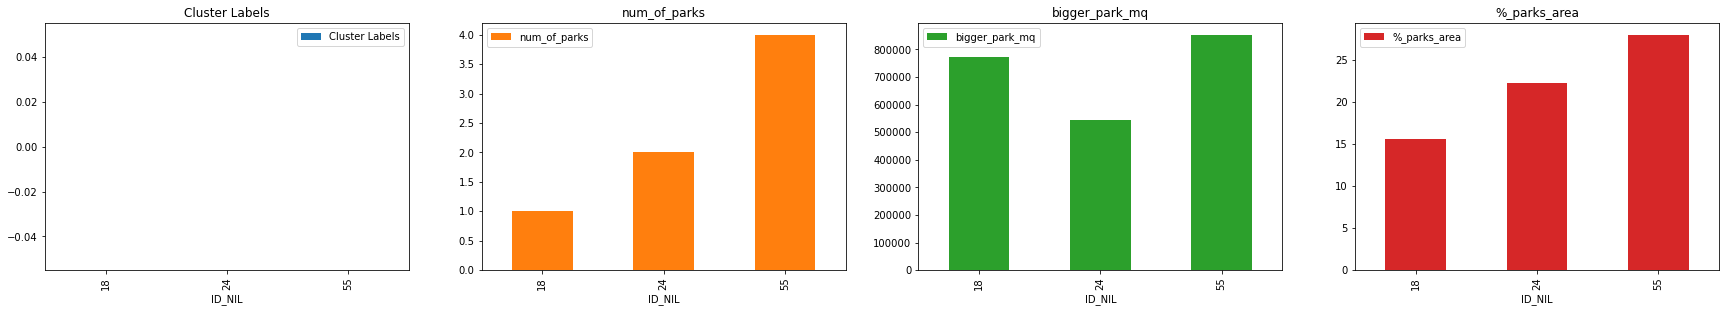

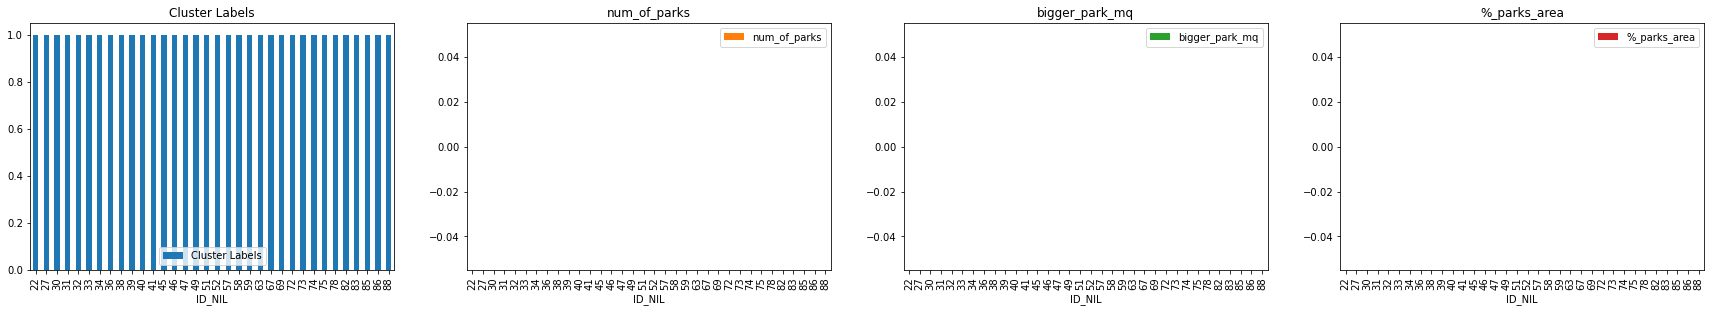

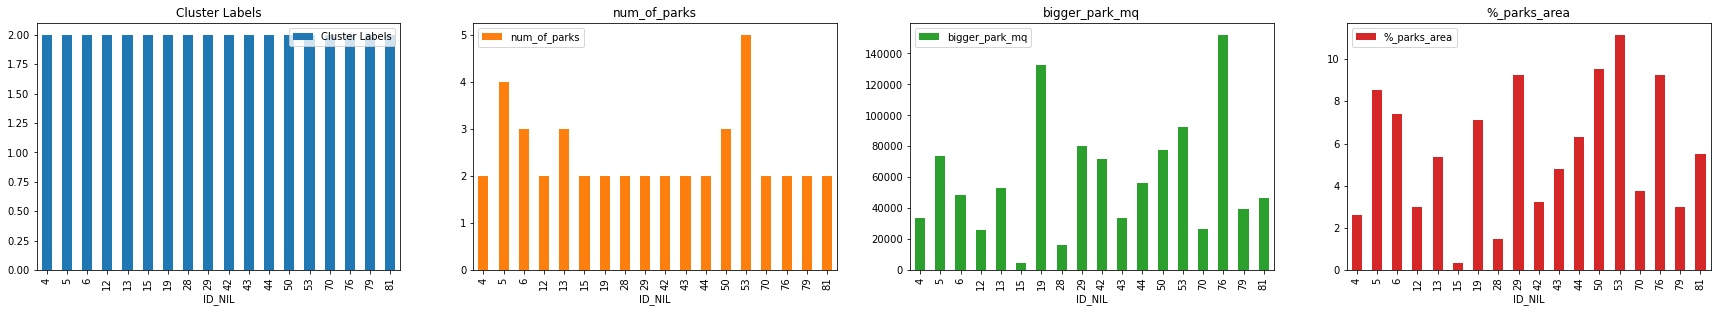

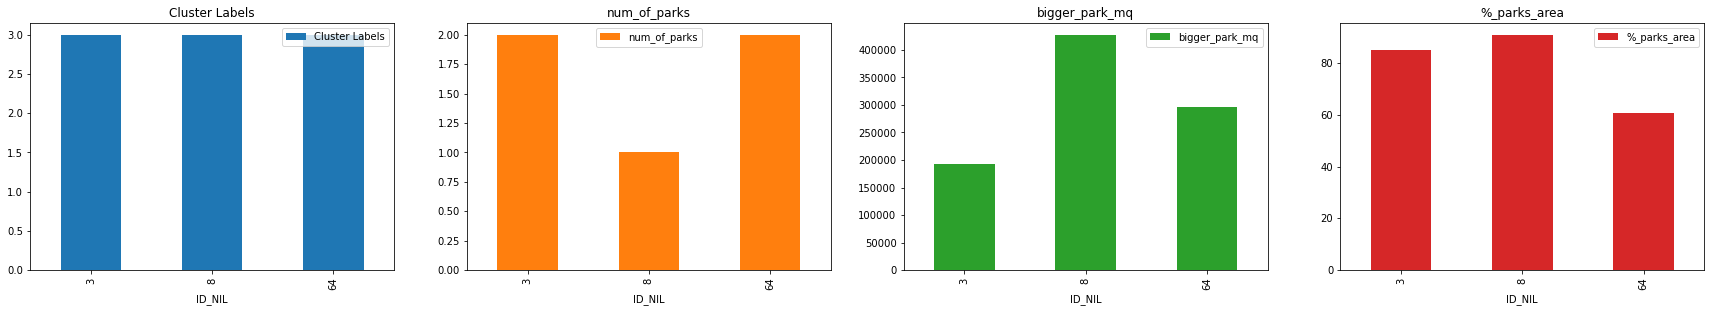

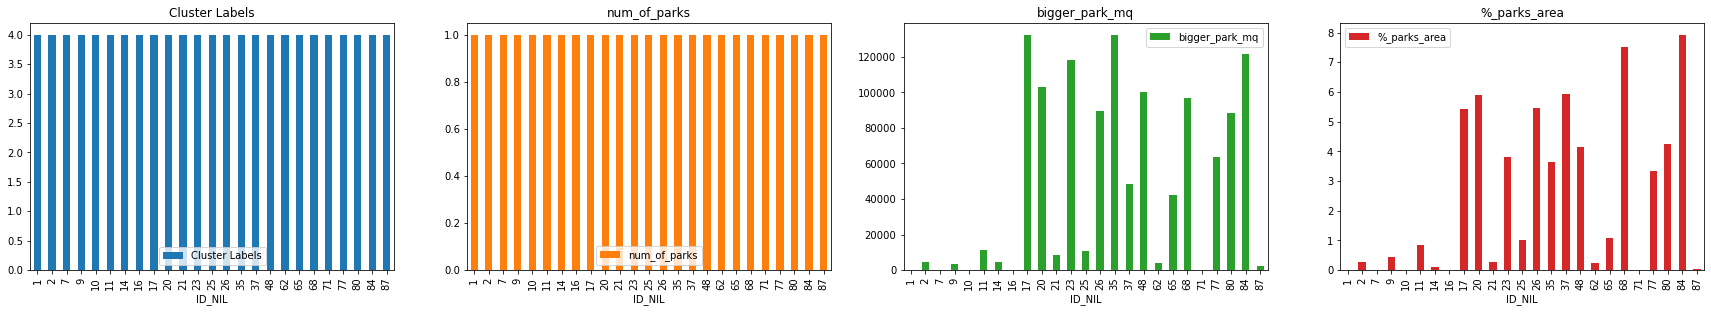

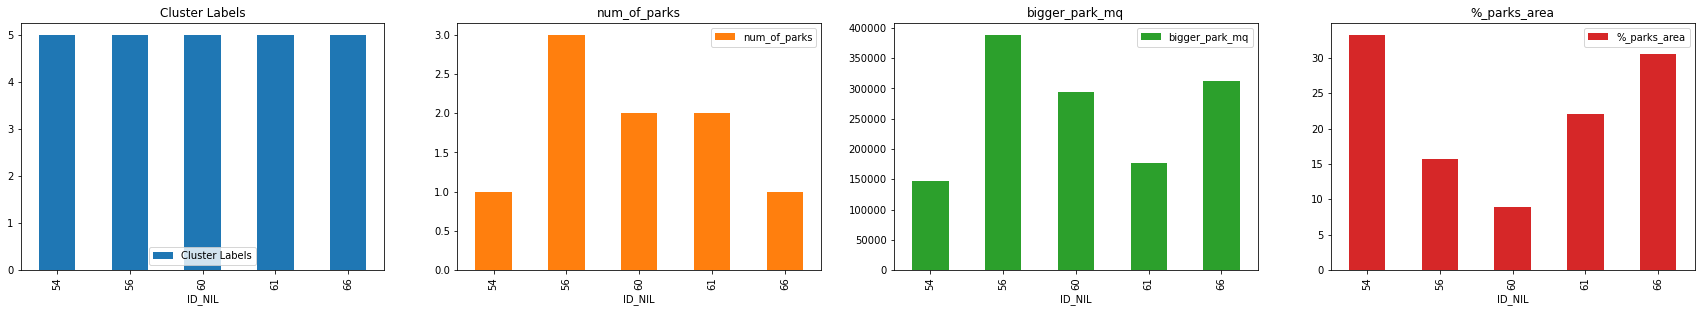

In [1965]:
#let's explore the clusters

for i in range(0,kclusters):
    globals()['cluster'+str(i)].plot.bar(subplots=True,figsize=(30,10),layout=(2,4))

Note that the choropleth label is needed for the choropleth map that will create later (the higher the label (mark), the darker the corresponding NIL)

In [1966]:
cluster0 #bigger parks in the city, big % of the NIL is green - choropleth label=8

,Cluster Labels,num_of_parks,bigger_park_mq,%_parks_area
ID_NIL,,,,
18,0,1.0,773404.921875,15.555303
24,0,2.0,545306.854492,22.274588
55,0,4.0,852748.097656,28.018331


In [1967]:
cluster1 #zero parks - choropleth label=0

,Cluster Labels,num_of_parks,bigger_park_mq,%_parks_area
ID_NIL,,,,
22,1,0.0,0.0,0.0
27,1,0.0,0.0,0.0
30,1,0.0,0.0,0.0
31,1,0.0,0.0,0.0
32,1,0.0,0.0,0.0
33,1,0.0,0.0,0.0
34,1,0.0,0.0,0.0
36,1,0.0,0.0,0.0
38,1,0.0,0.0,0.0


In [1968]:
cluster2 #not very green but more than 1 park - choropleth label=4

,Cluster Labels,num_of_parks,bigger_park_mq,%_parks_area
ID_NIL,,,,
4,2,2.0,33585.192383,2.634846
5,2,4.0,73821.117188,8.532211
6,2,3.0,48255.619629,7.415697
12,2,2.0,25949.348145,2.997047
13,2,3.0,53360.150879,5.352775
15,2,2.0,4656.901855,0.353587
19,2,2.0,132784.354492,7.094022
28,2,2.0,16461.083984,1.488719
29,2,2.0,80153.824219,9.233722


In [1969]:
cluster3 #big % of the NIL is covered by parks - choropleth label=10

,Cluster Labels,num_of_parks,bigger_park_mq,%_parks_area
ID_NIL,,,,
3,3,2.0,192970.566406,85.020895
8,3,1.0,427356.182617,90.842899
64,3,2.0,295755.894531,60.840306


In [1970]:
cluster4  #not very green and only 1 park - choropleth label=2

,Cluster Labels,num_of_parks,bigger_park_mq,%_parks_area
ID_NIL,,,,
1,4,1.0,106.402832,0.004544
2,4,1.0,4665.222656,0.284917
7,4,1.0,234.118164,0.016841
9,4,1.0,3474.496582,0.442235
10,4,1.0,110.123047,0.007077
11,4,1.0,11117.020020,0.840310
14,4,1.0,4406.505371,0.103651
16,4,1.0,248.708496,0.008275
17,4,1.0,132221.497070,5.437723


In [1971]:
cluster5 #intermediate -choropleth label=6

,Cluster Labels,num_of_parks,bigger_park_mq,%_parks_area
ID_NIL,,,,
54,5,1.0,147658.328125,33.240028
56,5,3.0,388514.902344,15.765017
60,5,2.0,294381.596680,8.918345
61,5,2.0,176228.044922,22.098074
66,5,1.0,312400.660156,30.494850


In [1972]:
df_green_dog_NIL.to_csv('df_green_dog_NIL')

## Choropleth map using folium

In [1973]:
address = 'Milano, Italy'

geolocator = Nominatim(user_agent="MI_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Milano, Italy are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Milano, Italy are 45.4668, 9.1905.


In [1974]:
df_choroplet_map=df_green_dog_NIL[['Cluster Labels']].reset_index()
df_choroplet_map

,ID_NIL,Cluster Labels
0,1,4
1,2,4
2,3,3
3,4,2
4,5,2
5,6,2
6,7,4
7,8,3
8,9,4
9,10,4


In [1975]:
#assign the marks (choropleth label) to each cluster --> the higher the greener

df_choroplet_map['choropleth']=df_choroplet_map['Cluster Labels'].apply(
    lambda x: 0 if x==1 else 4 if x==4 else 5 if x==2 else 7 if x==5 else 9 if x==0 else 10)
df_choroplet_map

,ID_NIL,Cluster Labels,choropleth
0,1,4,4
1,2,4,4
2,3,3,10
3,4,2,5
4,5,2,5
5,6,2,5
6,7,4,4
7,8,3,10
8,9,4,4
9,10,4,4


In [1976]:
pip install geojson

Note: you may need to restart the kernel to use updated packages.


In [1977]:
import geojson
with open('ds964_nil_wm.geojson') as f:
    gj = geojson.load(f)
#features = gj['features'][0]

In [1978]:
gj

{"crs": {"properties": {"name": "EPSG:4326"}, "type": "name"}, "features": [{"geometry": {"coordinates": [[[9.154221, 45.437752], [9.152745, 45.438873], [9.151911, 45.439588], [9.150472, 45.440673], [9.150087, 45.440931], [9.149445, 45.441424], [9.148029, 45.442534], [9.147748, 45.4428], [9.14599, 45.445691], [9.145574, 45.446357], [9.14432, 45.446062], [9.141307, 45.445375], [9.139124, 45.444857], [9.138155, 45.444598], [9.136673, 45.444196], [9.134995, 45.443734], [9.132945, 45.443088], [9.12455, 45.440789], [9.123214, 45.440436], [9.121453, 45.439923], [9.118825, 45.439135], [9.118827, 45.439133], [9.118931, 45.439036], [9.118954, 45.439014], [9.119073, 45.438905], [9.119106, 45.438874], [9.119126, 45.438855], [9.119323, 45.438675], [9.119358, 45.438642], [9.119533, 45.438482], [9.119572, 45.438445], [9.119655, 45.438365], [9.119721, 45.438277], [9.119791, 45.438185], [9.119943, 45.438004], [9.120052, 45.437843], [9.120156, 45.437709], [9.120228, 45.437608], [9.120277, 45.43752], [9

In [1979]:
import pandas as pd



m = folium.Map(location=[45.4668, 9.1905])

folium.Choropleth(
    geo_data=gj,
    name='choropleth',
    data=df_choroplet_map,
    columns=['ID_NIL','choropleth'],
    key_on='feature.properties.ID_NIL',
    fill_color='YlGn',
    fill_opacity=1,
    line_opacity=1,
    legend_name='Cluster Labels',
).add_to(m)

folium.LayerControl().add_to(m)

m

In [1980]:
df_choroplet_map.to_csv('df_choroplet_map.csv',index=False)